In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

In [2]:
path = '/home/aeb783/HPC-Final-Project/'

Read sgd datasets

In [3]:
n_threads = 8
thread_counts = np.arange(1, n_threads+1)
# thread_counts = 2**np.arange(6, dtype=int)

dfs = {
    '{}_threads'.format(i) : pd.read_csv(path + 'output/{}_threads_sgd.csv'.format(i))
    for i in thread_counts
}

## Residual norm vs iteration

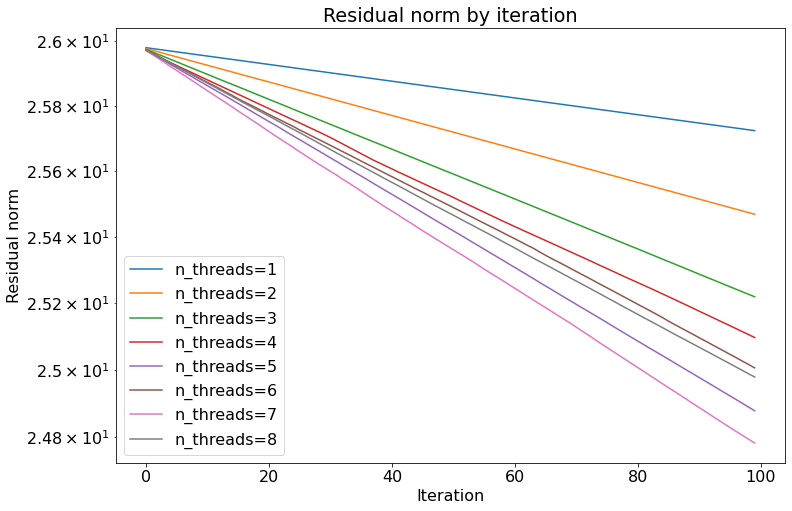

In [6]:
fig, ax = plt.subplots(figsize=(12,8))

for i in thread_counts:
    df = dfs['{}_threads'.format(i)]
    
    ax.semilogy(df['residual_norm'], label='n_threads={}'.format(i))
    
ax.set(
    xlabel='Iteration',
    ylabel='Residual norm',
    title='Residual norm by iteration',
)

ax.legend();

## Residual norm by time

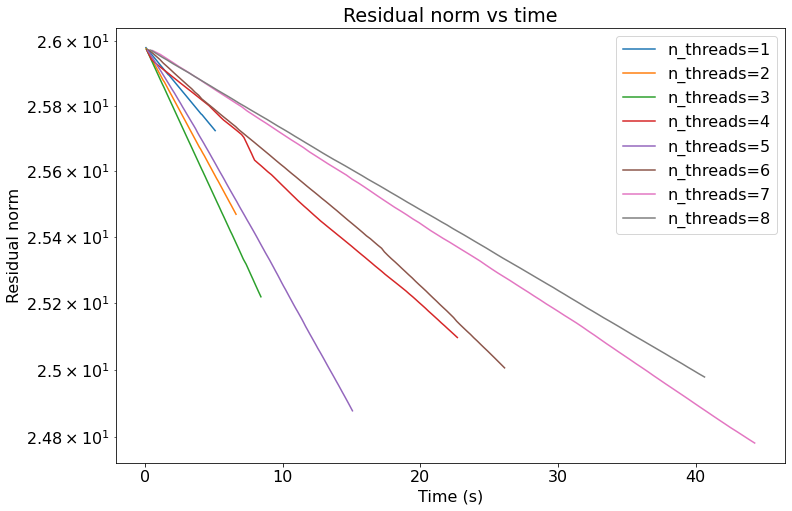

In [7]:
fig, ax = plt.subplots(figsize=(12,8))

for i in thread_counts:
    df = dfs['{}_threads'.format(i)]
    x = df['runtime']
    y = df['residual_norm']
    
    ax.semilogy(x, y, label='n_threads={}'.format(i))
    
ax.set(
    xlabel='Time (s)',
    ylabel='Residual norm',
    title='Residual norm vs time',
)


ax.legend();

## Time for convergence

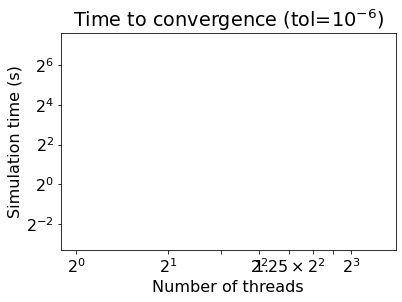

In [8]:
plt.loglog(base=2);
plt.xticks(thread_counts);
plt.ylim(0.1,200);
plt.xlabel('Number of threads');
plt.ylabel('Simulation time (s)');
plt.title(r'Time to convergence (tol=$10^{-6}$)');